# Ford GoBike Data Exploration(Part 1)
# by Leila Gharoni

## Table of Content
<ul>
    <li><a href="#IN">1. Introduction</a></li>
    <li><a href="#PW">2. Preliminary Wrangling</a></li>
    <li><a href="#UE">3. Univariate Exploration</a></li>
    <li><a href="#BE">4. Bivariate Exploration</a></li>
    <li><a href="#ME">5. Multivariate Exploration</a></li>
    <li><a href="#CON">6. Conclusions</a></li>
</ul>

<a id='IN'></a> 
## Introduction 

In this project, I will focus on Exploratory Data Analysis (EDA) and Explanatory Data Analysis, along with other key topics in data analysis, such as data cleaning.

This project is divided into two parts to demonstrate the importance and value of data visualization techniques in the data analysis process.

#### Part 1: Exploratory Data Visualization

I will use Python's visualization libraries to systematically explore a selected dataset, starting with plots of single variables and progressing to plots involving multiple variables.

#### Part 2: Explanatory Data Visualization

I will create a concise presentation showcasing interesting properties, trends, and relationships discovered in the dataset. This will involve transforming the exploratory visualizations from Part 1 into polished, explanatory visualizations to effectively convey insights.

### Selected Dataset : Ford GoBike System Data
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

### What is the structure of your dataset?

The dataset contains 183,412 records with 16 columns related to bike-sharing trips. The dataset is a CSV file containing information about bike rides, including details about when and where each ride started and ended, the user type, and the duration of the ride.

*note*: Missing values exist in station details and user demographics.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset include:

1. Time-Related Features: duration_sec, start_time, end_time to analyze trip lengths, identify peak usage periods, and uncover trends.

2. Location-Related Features: Station names and coordinates to explore station locations, trip endpoints, and identify popular stations.

3. User-Related Features: user_type, member_gender, and member_birth_year to compare behaviors between Subscribers and Customers and analyze demographic patterns.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
All the features mentioned above are relevant to my investigation. However, time-related features and location-related features are particularly helpful as they provide critical insights into trip patterns, peak usage periods, and station distribution.

<a id='PW'></a> 
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgobike-tripdata.csv")

In [17]:
# check to see how many rows & Columns
df.shape

(183412, 16)

In [18]:
# let's see the first few rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [20]:
# Check unique values in eac columns
print(df.nunique())

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [21]:
# check for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning

In [3]:
#making a copy of dataframes
df_clean = df.copy()

In [4]:
# dropping the null values
df_clean.dropna(inplace=True)

In [5]:
# Converting the start_time and end_time columns(object) to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [6]:
# Extracting the day, month and year colunns from the start_time and end_time

import datetime as dt
df_clean['start_day'] = df_clean['start_time'].dt.day_name()
df_clean['start_month'] = df_clean['start_time'].dt.month_name()
df_clean['start_year'] = df_clean['start_time'].dt.year
df_clean['start_hr'] = df_clean['start_time'].dt.hour
df_clean['start_hr'] = df_clean.start_hr.astype(str)

df_clean['end_day'] = df_clean['end_time'].dt.day_name()
df_clean['end_month'] = df_clean['end_time'].dt.month_name()
df_clean['end_hr'] = df_clean['end_time'].dt.hour
df_clean['end_hr'] = df_clean.end_hr.astype(str)

In [7]:
# add a duration_min to the columns
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [8]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_hr,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,2019,17,Friday,March,8,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,2019,12,Friday,March,5,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,2019,17,Friday,March,4,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,0,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,0,29.883333


In [9]:
# save the cleaned data to csv file
df_clean.to_csv('fordgobike-tripdata-clean.csv',index=None)

In [10]:
df_clean = pd.read_csv('fordgobike-tripdata-clean.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_hr,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,2019,17,Friday,March,8,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,2019,12,Friday,March,5,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,2019,17,Friday,March,4,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,0,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,0,29.883333


<a id='UE'></a> 
## Univariate Exploration

In this section, we examine the distributions of individual variables. By analyzing these distributions, we can identify unusual points or outliers that may require further investigation.


### 1.How long does a typical bike ride last?

 I am going to analyze the the length of the rides. Knowing how long a ride takes is important for predicting bike demand, scheduling maintenance, setting pricing, improving user experience, and planning infrastructure. It helps optimize the bike-sharing system's efficiency and ensures bikes are available and in good condition when needed.

In [30]:
df_clean.start_time.describe()

count                      174952
unique                     174941
top       2019-02-11 17:05:07.840
freq                            2
Name: start_time, dtype: object

In [31]:
df_clean.end_time.describe()

count                      174952
unique                     174939
top       2019-02-28 17:40:37.328
freq                            2
Name: end_time, dtype: object

In [32]:
df_clean.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'How long does a typical bike ride last?')

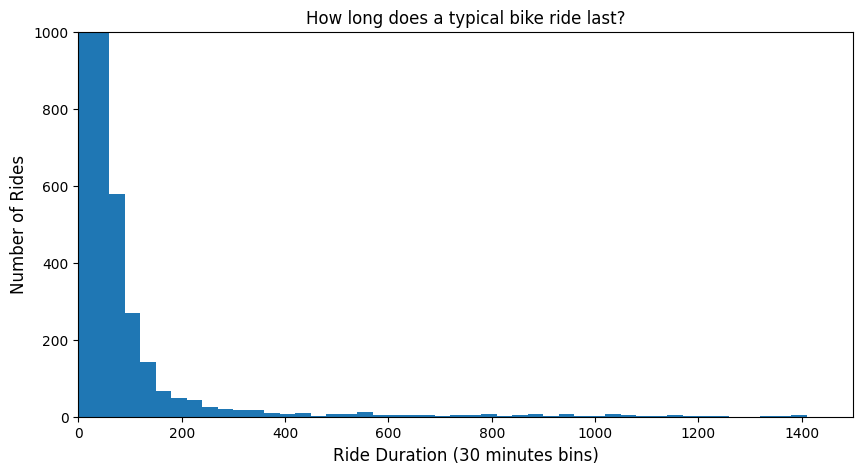

In [33]:
# Set up the bins for the histogram
bins = np.arange(0, df_clean.duration_min.max(0)+1, 30)

# Create the plot
plt.figure(figsize=(10,5))
plt.hist(data=df_clean, x='duration_min', bins=bins)

plt.xlim((0,1500))
plt.ylim((0,1000))

plt.ylabel('Number of Rides', fontsize=12)
plt.xlabel('Ride Duration (30 minutes bins)', fontsize=12);
plt.title('How long does a typical bike ride last?', fontsize=12)

#### Interpretation:

. Most rides occur around the middle of February, with the median start time on February 15.

. The rides end times extend slightly into March, indicating some overnight trips.

. The average ride duration is approximately 11.73 minutes, with a standard deviation of 27.37 minutes, showing a wide variation.

. Most rides are short, with 50% lasting between 5.38 minutes (25th percentile) and 13.15 minutes (75th percentile).

. The shortest ride is just over 1 minute, while the longest recorded ride lasts over 23 hours (1,409 minutes), which may be an outlier.

. The majority of bike rides fall within the 5 to 20-minute range, as shown in the histogram with a logarithmic x-axis.

. There is a sharp drop-off in the number of rides as duration increases, indicating the system is primarily used for short trips.

This data confirms that the bike-sharing system is mostly used for short, quick commutes or leisure rides. These insights are valuable for optimizing bike distribution, scheduling maintenance, and ensuring availability during peak times.
This analysis highlights key usage patterns and provides actionable insights for managing the bike-sharing system efficiently.

## Cleaning Outliers in the duration_min

In [11]:
quartiles = np.percentile(df_clean['duration_min'], [25, 50, 75])
median = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

5.747333333333334

In [12]:
#making a copy of dataframes
df1 = df_clean.copy()

In [13]:
df1 = df_clean.query('(duration_min > @median - 5 * @sig) & (duration_min < @median + 5 * @sig)')

In [21]:
df1.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_year,duration_min
count,171317.000000,171317,171317,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.000000,171317.0,171317.000000
mean,591.042985,2019-02-15 21:09:11.547172096,2019-02-15 21:19:03.089277184,138.612712,37.771095,-122.351498,135.960033,37.771286,-122.351031,4478.271567,1984.819358,2019.0,9.850716
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,1.016667
25%,319.000000,2019-02-08 08:20:11.166000128,2019-02-08 08:29:40.476999936,49.000000,37.770083,-122.411738,44.000000,37.770407,-122.411403,3792.000000,1980.000000,2019.0,5.316667
50%,502.000000,2019-02-15 19:55:30.012999936,2019-02-15 20:03:09.652000,104.000000,37.780760,-122.398279,100.000000,37.781010,-122.397405,4959.000000,1987.000000,2019.0,8.366667
75%,766.000000,2019-02-22 11:00:39.535000064,2019-02-22 11:11:35.743000064,239.000000,37.797320,-122.283093,233.000000,37.797320,-122.285171,5504.000000,1992.000000,2019.0,12.766667
max,2234.000000,2019-02-28 23:59:18.548000,2019-03-01 00:20:44.074000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,37.233333
std,373.426333,NaN,NaN,111.144681,0.100637,0.117917,110.684689,0.100537,0.117450,1661.291088,10.088808,0.0,6.223772


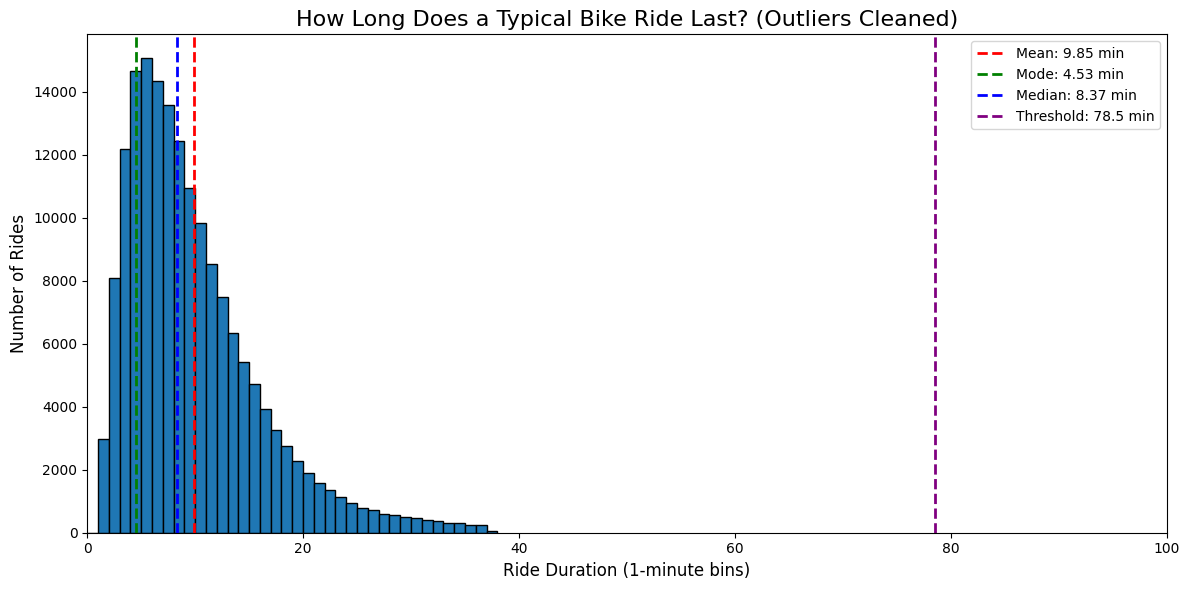

In [14]:
import statistics

# Define the data
graph = df1['duration_min']

# Create 1-minute bins from 0 to the next whole number after the max duration
bins = np.arange(0, int(graph.max()) + 2, 1)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(graph, bins=bins, edgecolor='black')
plt.xlim(0, 100)

# Axis labels and title
plt.xlabel('Ride Duration (1-minute bins)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('How Long Does a Typical Bike Ride Last? (Outliers Cleaned)', fontsize=16)

# Add vertical lines for statistical measures
mean_val = statistics.mean(graph)
mode_val = statistics.mode(graph)
median_val = statistics.median(graph)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f} min')
plt.axvline(mode_val, color='green', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f} min')
plt.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f} min')
plt.axvline(78.5, color='purple', linestyle='--', linewidth=2, label='Threshold: 78.5 min')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


#### interpration:

. A typical bike ride Lasts around 9–13 minutes, based on the median and mode and there is rare longer rides that increase the average.

. The mode is the shortest—most rides are very short.

. The mean is higher than the median → indicating positive skew (right-skewed).

. The majority of rides are under ~20 minutes, with the number of rides dropping sharply after that.

## 2. What time of day are the bikes used the most?
The analysis aims to identify the times when the Ford GoBike system is most active, ensuring bikes are available during high-demand periods for a smoother user experience.

/tmp/ipykernel_68/3939332793.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['start_hr'] = df1['start_hr'].astype(str).astype(hourcat)


Text(0.5, 1.0, 'What time of day are the bikes used the most?')

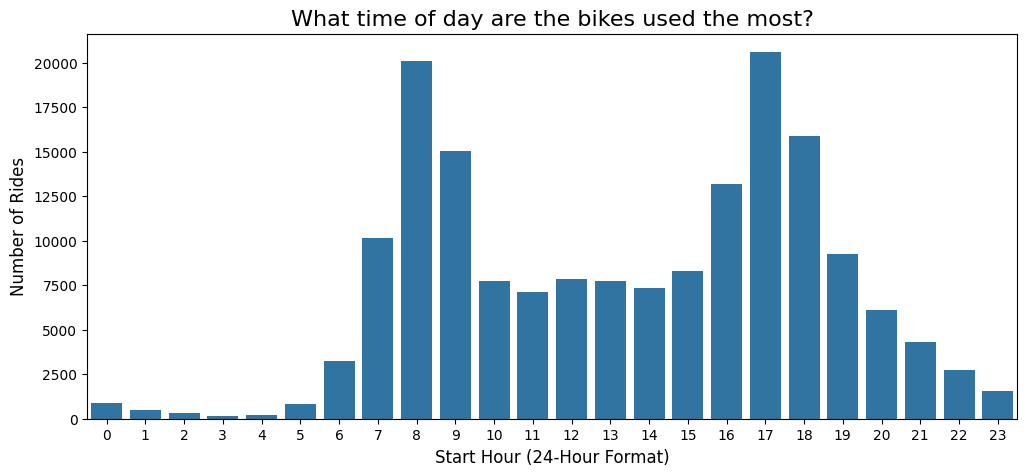

In [25]:
plt.figure(figsize=(12,5))

# Define the order of the hours (0 to 23)
hour_order = [str(i) for i in range(24)]  
hourcat = pd.api.types.CategoricalDtype(ordered=True, categories=hour_order)
df1['start_hr'] = df1['start_hr'].astype(str).astype(hourcat) 

# Create the count plot
sns.countplot(data=df1, x='start_hr')

# Add labels and title
plt.xlabel('Start Hour (24-Hour Format)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('What time of day are the bikes used the most?', fontsize=16)


#### Interpretation:

. The busiest hour is 5 PM, followed by 8 AM.
High activity is concentrated during the morning peak (7–9 AM) and evening peak (4–6 PM), which aligns with common commuting times.

. These patterns suggest that the bike-sharing system is heavily used by individuals commuting to work, school, or other daily activities.

## 3. What day of the week is bike usage the highest?
The analysis aims to identify the days when the Ford GoBike system is most active, ensuring bikes are available during high-demand days for a smoother user experience.

/tmp/ipykernel_68/3578668037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['start_day'] = df1['start_day'].astype(weekdaycat)


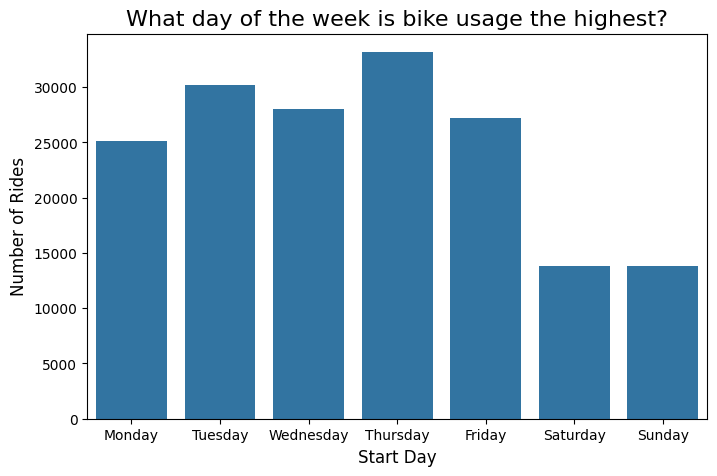

In [26]:
plt.figure(figsize=(8,5))

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df1['start_day'] = df1['start_day'].astype(weekdaycat)

sns.countplot(data=df1, x='start_day')
plt.xlabel('Start Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title("What day of the week is bike usage the highest?", fontsize=16);


#### Interpretation:

. Peak Usage Days: Thursdays see the highest bike usage, followed by Tuesday and Wednesday. In contrast, weekends show the least usage.

. The high usage during weekdays indicates that the bike-sharing system is primarily used for commuting, running errands, or other daily activities.

. These patterns highlight the importance of optimizing bike availability and scheduling maintenance to align with weekday demand, ensuring smooth operations and user satisfaction.

### 4. Top destinations for bike rides

In [27]:
# Get the top 5 most common destination stations
top_dst = df1['end_station_name'].value_counts().index[:5]

# Filter the dataframe to include only trips to those top 5 destinations
top_dst_df = df1.loc[df1['end_station_name'].isin(top_dst)]

# Display the first few rows of the filtered data
top_dst_df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_hr,duration_min
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Male,No,Thursday,February,2019,23,Thursday,February,23,6.416667
45,717,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,...,Male,No,Thursday,February,2019,23,Thursday,February,23,11.950000
81,294,2019-02-28 23:15:21.113,2019-02-28 23:20:15.798,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,...,Female,No,Thursday,February,2019,23,Thursday,February,23,4.900000
87,2151,2019-02-28 22:42:05.215,2019-02-28 23:17:56.967,78.0,Folsom St at 9th St,37.773717,-122.411647,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Male,No,Thursday,February,2019,22,Thursday,February,23,35.850000
111,542,2019-02-28 22:58:06.628,2019-02-28 23:07:09.508,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Male,No,Thursday,February,2019,22,Thursday,February,23,9.033333


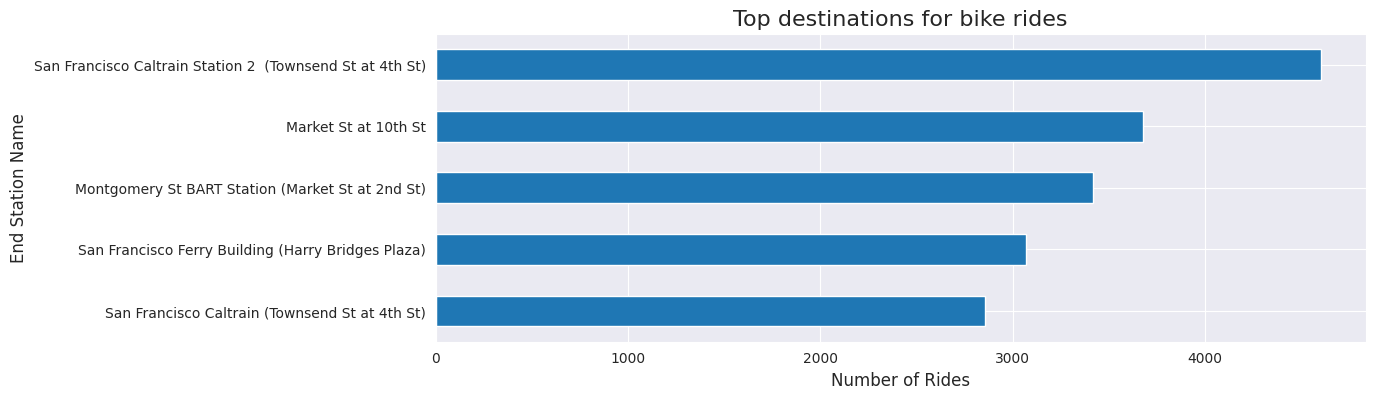

In [28]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')
top_dst_df['end_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh');
plt.title('Top destinations for bike rides', fontsize=16)
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('End Station Name', fontsize=12);

#### Interpretation:
The top destination by far is San Francisco Caltrain Station 2, highlighting its importance as a major commuting hub—likely used by subscribers for last-mile connections to trains. The remaining top stations are located in key business or transit-heavy areas, suggesting that many riders use bikes to commute into downtown or connect between public transit lines.

This insight supports the broader trend seen in earlier plots: Subscribers use bikes more regularly for commuting and practical transport.

<a id='BE'></a> 
## Bivariate Exploration

In this section, we investigate relationships between pairs of variables in our data.

### 1. How does the user type affect the bike usage?


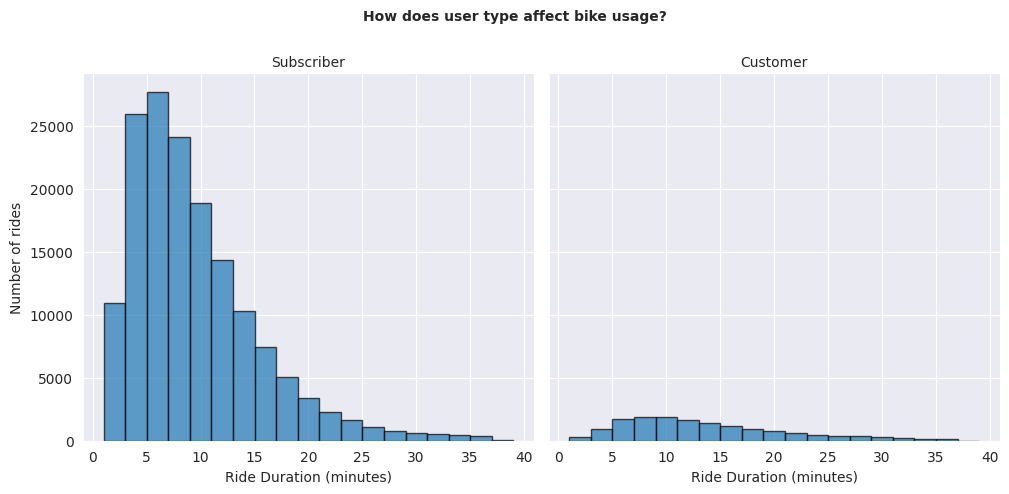

In [29]:
# Set up the FacetGrid for user type comparison
g = sns.FacetGrid(df1, col='user_type', col_wrap=2, height=5, sharex=True, sharey=True)

# Define bin size 
bins = np.arange(df1['duration_min'].min(), df1['duration_min'].max() +2, 2)

# Plot histogram with improved aesthetics
g.map(plt.hist, 'duration_min', bins=bins, edgecolor='black', alpha=0.7)

# Label axes and set subplot titles
g.set_axis_labels('Ride Duration (minutes)', 'Number of rides')
g.set_titles(col_template="{col_name}")

# Adjust layout and add a main title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('How does user type affect bike usage?', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


#### Interpretation:

The histogram clearly shows that Subscribers use the bikes far more frequently than Customers. This is evident from the significantly higher number of rides across all duration bins for Subscribers.

Subscribers:
The distribution is right-skewed, with the majority of rides clustered between 5 to 10 minutes.
The mode (peak frequency) appears around the 6–8 minute bin, indicating that most subscriber trips are short.
The total ride count is much higher, suggesting frequent, possibly commuter-based use.

Customers:
The distribution is more spread out and flatter, with fewer overall rides.
Ride durations are slightly more varied, with no sharp peak.
Customers may be more occasional users—perhaps tourists or one-time riders—who take slightly longer trips on average.

### 2. Who use the bike more regulary and on a daily basis?

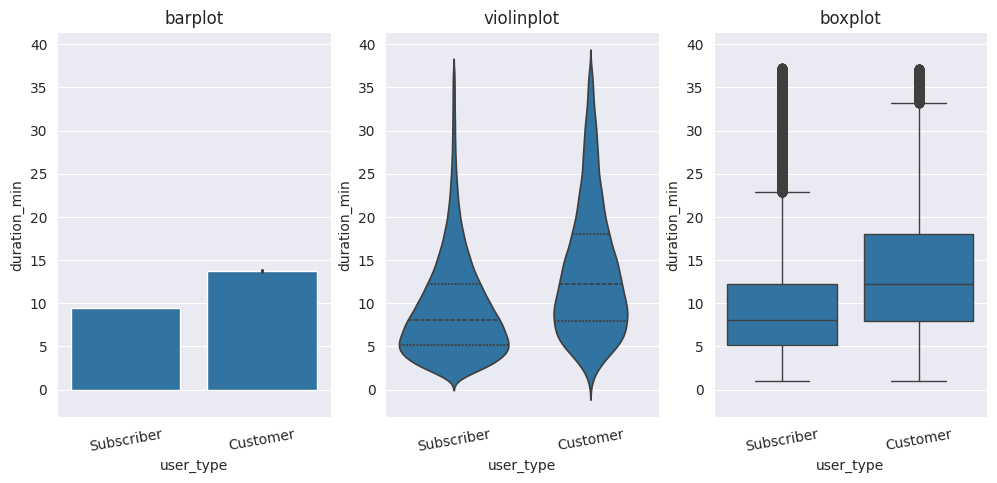

In [30]:
plt.figure(figsize = [12,5])

# violinplot
plt.subplot(1, 3, 2)
ax1 = sns.violinplot(data = df1, x = 'user_type', y = 'duration_min', inner='quartile')       
plt.xticks(rotation = 10)             
plt.title('violinplot', fontsize=12)

# barplot
plt.subplot(1, 3, 1)
sns.barplot(data = df1, x = 'user_type', y = 'duration_min')
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())            
plt.title('barplot', fontsize=12);

# boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data = df1, x = 'user_type', y = 'duration_min')
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())            
plt.title('boxplot', fontsize=12);

#### Interpretation:
1. Barplot: Shows the average ride duration.
Customers have a higher average trip duration than Subscribers.This suggests that although Subscribers ride more often (as seen in the histogram earlier), Customers tend to take longer rides.

2. Violin Plot: Displays the distribution shape along with quartiles.
Subscriber rides are more concentrated around shorter durations, with the mode around 6–8 minutes.
Customer rides are more spread out, with a broader distribution and a higher median.
This reflects that Customers may use bikes more casually or for leisure, whereas Subscribers are likely regular commuters.

3. Boxplot: Visualizes the median, interquartile range (IQR), and outliers.
Customers have a higher median and a wider IQR, confirming that their ride durations vary more.
Both groups have outliers above the upper whisker, indicating occasional long trips.

4. overal conclusion:
Subscribers take more frequent, shorter rides, consistent with regular, possibly utilitarian use.
Customers take fewer but longer rides, with more variability, likely reflecting casual or recreational use.

### 3. What is the corolation between top destinations and bike usage?

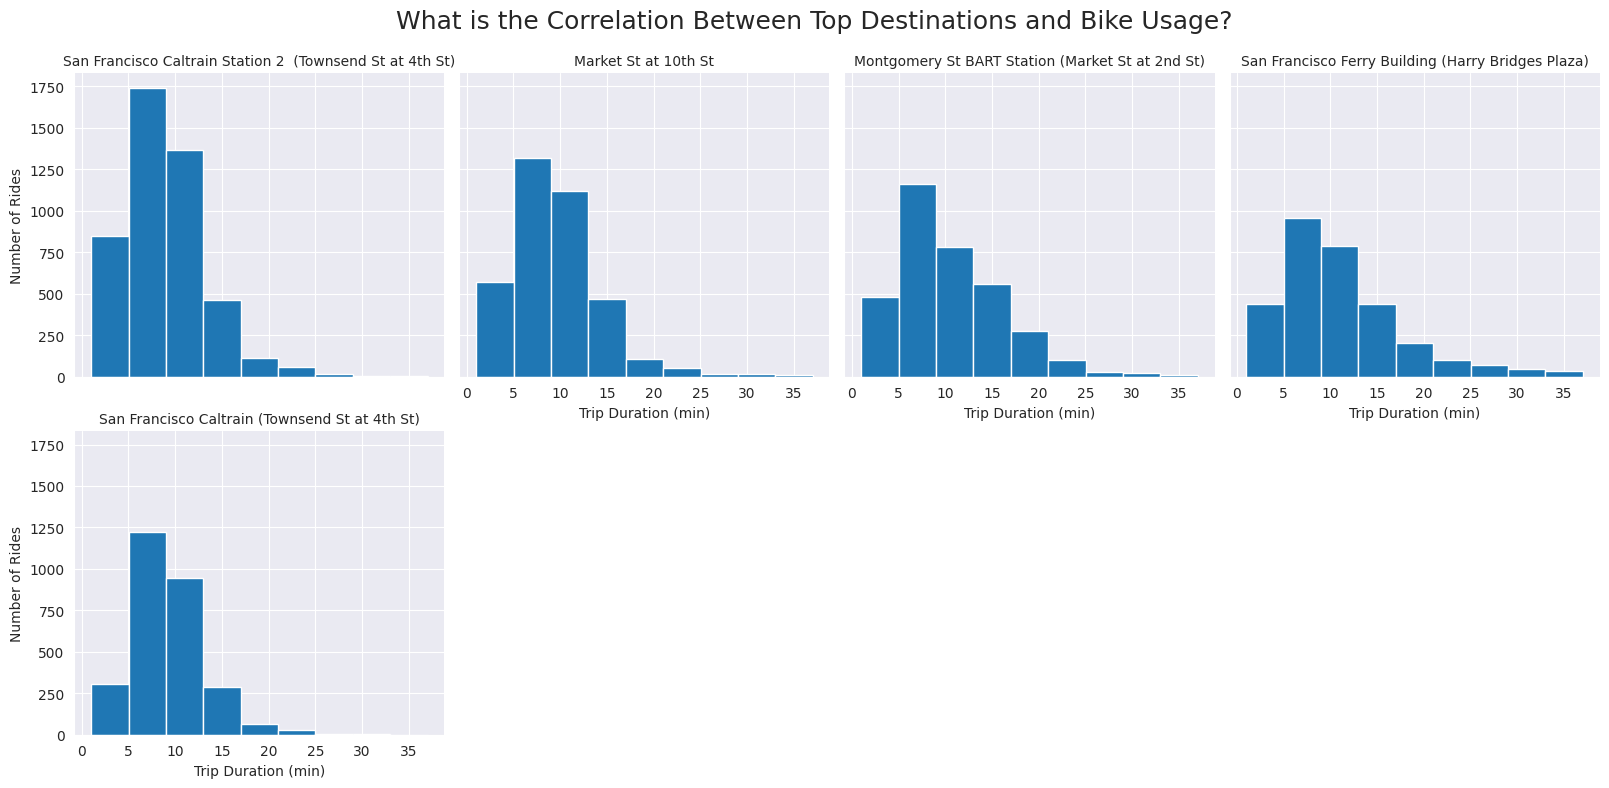

In [32]:
# Determine the order of end stations by number of trips (for FacetGrid plotting)
trip_counts = top_dst_df.groupby('end_station_name').count()
station_order = trip_counts.sort_values('duration_sec', ascending=False).index

# Plot distribution of trip durations for each top destination
g = sns.FacetGrid(
    data=top_dst_df, 
    col='end_station_name', 
    col_wrap=4, 
    height=4, 
    col_order=station_order, 
    sharey=True)

# Create histograms for trip durations
g.map(plt.hist, 'duration_min', bins=np.arange(df1['duration_min'].min(), 
                                               df1['duration_min'].max() + 1, 4))

# Label axes and subplots
g.set_axis_labels('Trip Duration (min)', 'Number of Rides')
g.set_titles('{col_name}')

# Adjust spacing and add main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('What is the Correlation Between Top Destinations and Bike Usage?', fontsize=18)

plt.show()

#### Interpretation:

. San Francisco Caltrain Station 2 (Townsend St at 4th St) has the highest number of short-duration trips, peaking under 10 minutes.

. Other stations like Montgomery St BART and Ferry Building also have a strong concentration of short trips but less volume.
All top destinations show a right-skewed distribution — most trips are under 20 minutes.

. High bike usage correlates with shorter trips.

. Top destinations are likely commuter hotspots where users take quick, frequent trips.
This suggests that infrastructure and accessibility at these points cater to short, utilitarian rides (e.g., commuting, errands).

<a id='ME'></a> 
## Multivariate Exploration

In this section, we investigate relationships between three or more variables in our data.

### 1.  Average Trip Duration by Day and User Type

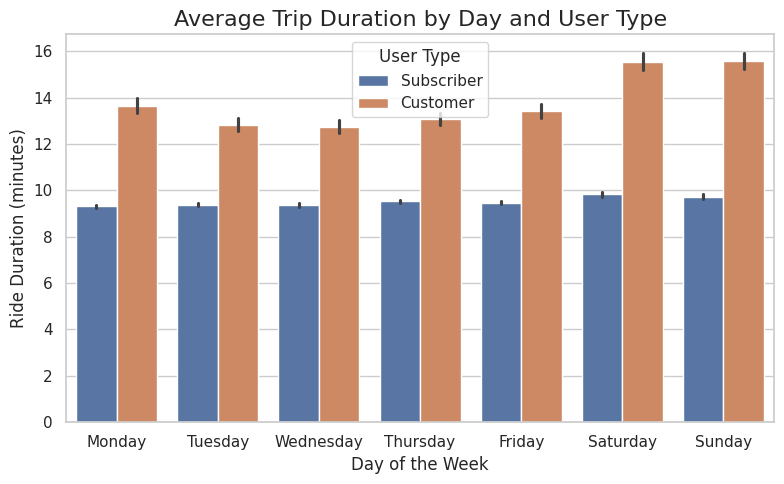

In [15]:
# Set seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))

# Define the weekday order
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)

# Ensure 'start_day' is treated as a categorical variable with the defined order
df1['start_day'] = df1['start_day'].astype(weekdaycat)

# Create the bar plot
sns.barplot(data=df1, x='start_day', y='duration_min', hue='user_type')

# Add labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Ride Duration (minutes)', fontsize=12)
plt.title("Average Trip Duration by Day and User Type", fontsize=16)
plt.legend(title='User Type')

# Display the plot
plt.tight_layout()
plt.show()

#### Interpretation:

. There's a clear distinction in behavior between user types.

. Customers ride longer and peak on weekends, pointing to leisurely or exploratory usage.

. Subscribers have short, consistent durations, indicating utilitarian or commuting purposes.

. Day of the week impacts casual riders more, but not regular subscribers.

### 2. Median Trip Duration by Gender and Top Destination

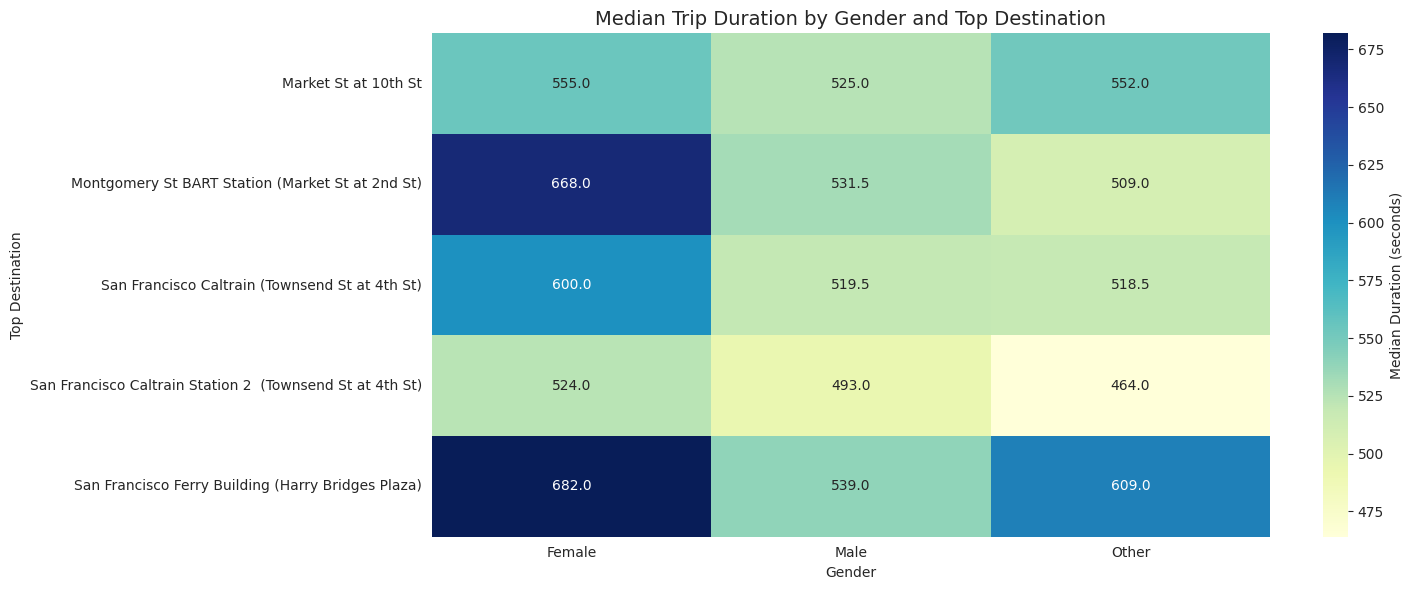

In [33]:
# Set figure size
plt.figure(figsize=(15, 6))

# Group by gender and top destination, then calculate the median duration
cat_means = top_dst_df.groupby(['member_gender', 'end_station_name']).median(numeric_only=True)['duration_sec'].reset_index()

# Pivot the table to create a matrix suitable for a heatmap
cat_means = cat_means.pivot(index='end_station_name', columns='member_gender', values='duration_sec')

# Plot heatmap
sns.heatmap(cat_means, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={"label": "Median Duration (seconds)"})

# Label axes
plt.xlabel("Gender")
plt.ylabel("Top Destination")
plt.title("Median Trip Duration by Gender and Top Destination", fontsize=14)

plt.tight_layout()
plt.show()


#### Interpretation: 

. Gender affects trip duration, with female riders typically having longer rides.

. Destination matters too, rides ending at transit hubs like Ferry Building and Montgomery St BART tend to be longer.

. This could suggest behavioral differences: e.g., women may use bikes for longer or more scenic trips, while men may favor shorter, direct commutes.


### 3. Hourly Bike Usage by Gender and Day of Week

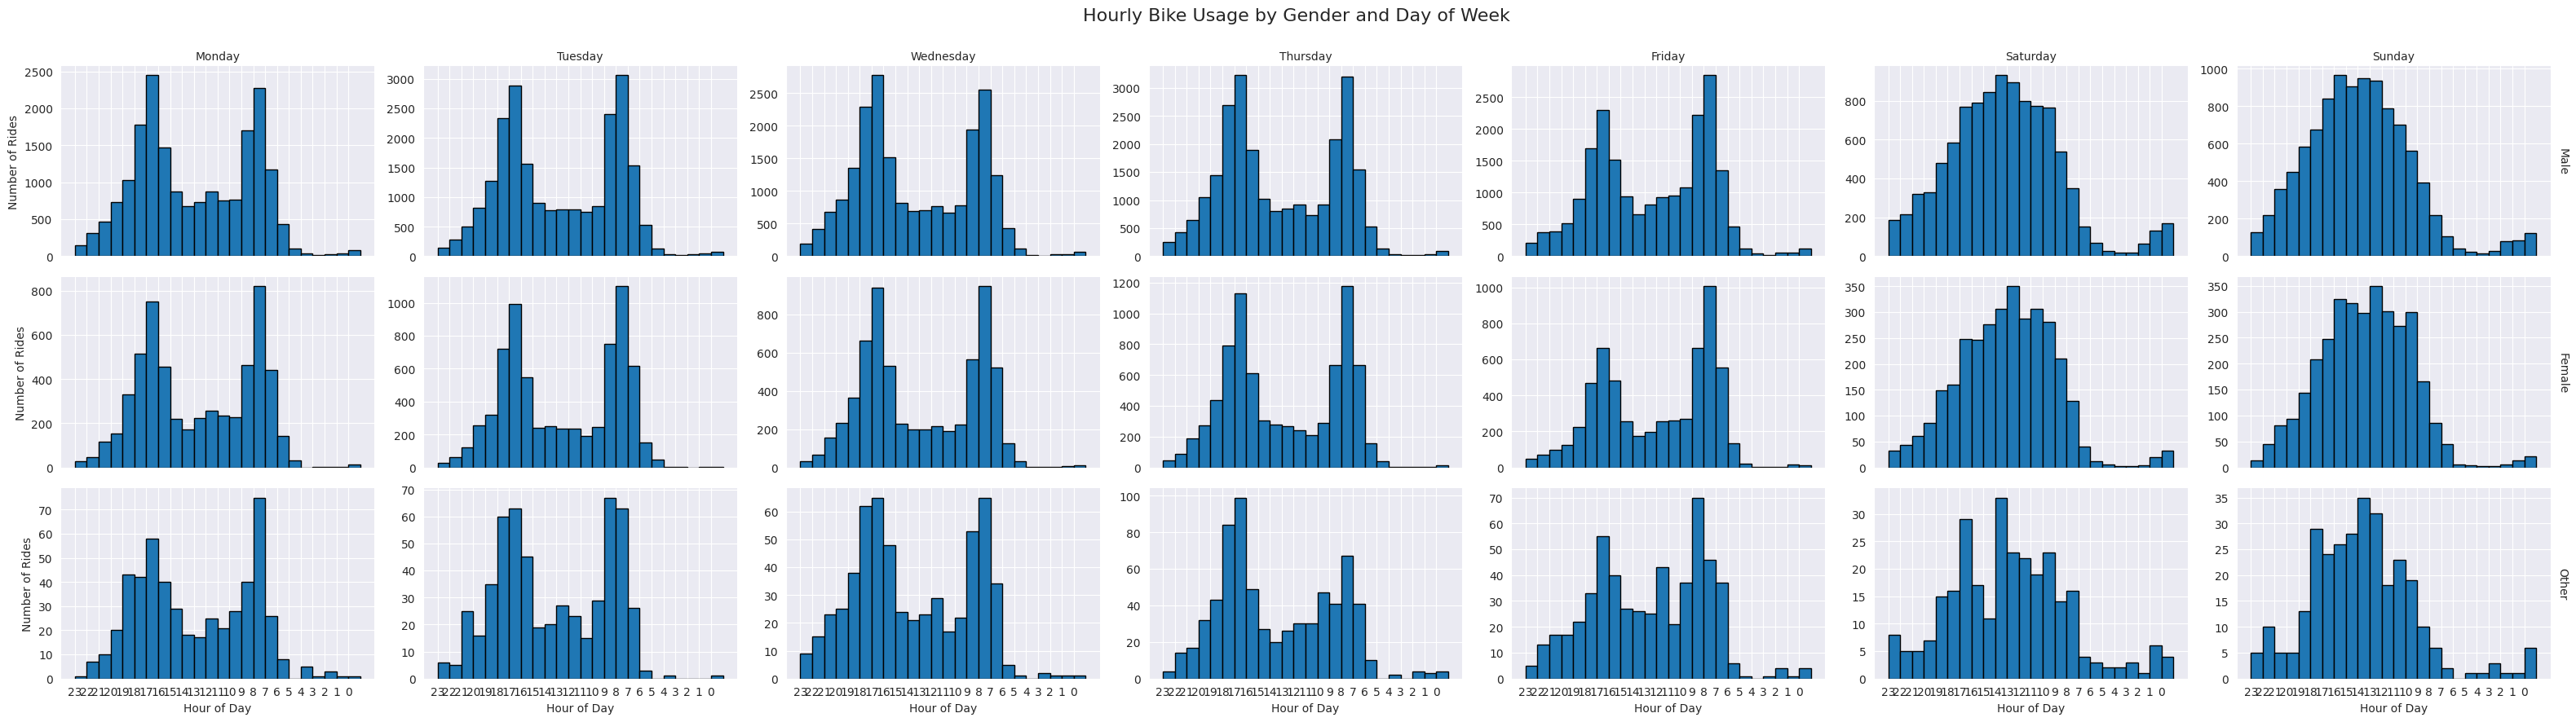

In [38]:
# Define hourly bins (0 to 24)
bins = np.arange(0, 25, 1)

# Create FacetGrid
g = sns.FacetGrid(data=df1, col="start_day", row="member_gender", margin_titles=True, sharey=False, height=3, aspect=1.5 )

# Map histogram
g.map(plt.hist, 'start_hr', bins=bins, edgecolor='black')

# Add axis labels
g.set_axis_labels("Hour of Day", "Number of Rides")

# Add custom titles
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Hourly Bike Usage by Gender and Day of Week", fontsize=16)

plt.show()

#### Interpretation: 

. There's a strong correlation between gender, day of the week, and hourly bike usage.

. Commuting dominates weekdays (8 AM & 5 PM peaks), especially for males and females.

. Weekend usage shifts to midday across all genders, indicating non-work related riding.

. Males consistently have higher ride volume, while females and "Other" users follow similar patterns at a smaller scale.

<a id='CON'></a> 
## Conclusions

#### Trip Duration Characteristics
. The system is optimized for short trips, as most rides are under 20 minutes.
. Outliers (e.g., 23-hour trips) suggest occasional edge cases or improper bike returns.
. Most users complete trips within 5–13 minutes, showing efficient use of bikes.

#### User Behavior Patterns
. Subscribers ride during peak hours (commute-focused), indicating strong dependency on the system for daily routines.
. Customers prefer weekends and midday rides, implying more recreational or exploratory use—possibly by tourists.
. Ride durations are shorter during commute hours and longer during off-peak or weekend times.

#### Time-of-Day Impact
. Morning peak (7–9 AM) and evening peak (4–6 PM) account for the majority of weekday trips.
. Weekend rides peaks between 11 AM–2 PM, suggesting relaxed, non-commuting activity.
. Low overnight activity reinforces the idea that the system is not typically used for late-night travel.

#### Day-of-Week Dynamics
. Thursdays are the busiest, likely due to a mix of commute and pre-weekend activity.
. Saturday and Sunday show lower overall rides but longer average durations.
. The system is underutilized on weekends, representing an opportunity for promotions or leisure-focused campaigns.

#### Geographic Insights
. High-use stations are clustered around major transit points, business districts, and downtown cores.
. Last-mile connection behavior is evident, especially at San Francisco Caltrain stations.
. This supports integration efforts between public transit and bike sharing.
